<a href="https://colab.research.google.com/github/mdaiyub/Algorithm/blob/main/Prodramp/GNN_Experiment_KarateClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GNN Explaination:**
The explaination in this notebook is based on the GNNN example from the PyG documentation
https://pytorch-geometric.readthedocs.io/en/latest/notes/colabs.html
- Introduction: Hands-on Graph Neural Networks

In [1]:
!python --version

Python 3.9.16


In [2]:
!python -c "import torch; print(torch.version.cuda)"

11.6


In [3]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

1.13.1+cu116


In [4]:
# Install required packages.
#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-geometric


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 86.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.2/616.2 KB 35.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.0-py3-none-any.whl size=909897 sha256=52c0c5c75ce53e283d600cedf6a9942215cefddcd07d817cc8fb147875151787
  Stored in directory: /ro

In [5]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
from torch_geometric.datasets import KarateClub

In [7]:
dataset = KarateClub()

In [8]:
data = dataset[0]  # Get the first graph object.
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


# **Train Mask**
- (4) There also exists an additional attribute called train_mask, which describes for which nodes we already know their community assigments. 

In [9]:
data.stores

[{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

In [10]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [11]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

Above only 4 nodes have mask value set as True, it means only 4 out of 34 nodes have community or class assignment, rest of the 30 nodes needs community assignment.

Train Mask -> In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

# **Validation and Test Mask:**

If the graph holds the additional attributes i.e. val_mask and test_mask, which denotes which nodes should be used for validation and testing.

# **GNN Objective:**
- We have 4 nodes only with the community assigned so we need to assign remaining 30 nodes 

In [12]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [13]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

Embedding shape: [34, 2]


In [14]:
h

tensor([[ 0.0962,  0.0115],
        [ 0.0235,  0.0129],
        [ 0.0432,  0.0201],
        [ 0.0401,  0.0162],
        [ 0.0522, -0.0054],
        [ 0.0775,  0.0011],
        [ 0.0763,  0.0031],
        [ 0.0300,  0.0131],
        [ 0.0107,  0.0181],
        [ 0.0014,  0.0195],
        [ 0.0575, -0.0035],
        [ 0.0867,  0.0090],
        [ 0.0353,  0.0106],
        [ 0.0242,  0.0179],
        [-0.0114,  0.0138],
        [-0.0109,  0.0173],
        [ 0.0740,  0.0046],
        [ 0.0188,  0.0012],
        [-0.0139,  0.0210],
        [ 0.0068,  0.0108],
        [ 0.0077,  0.0168],
        [ 0.0014,  0.0033],
        [-0.0065,  0.0175],
        [ 0.0657,  0.0242],
        [ 0.1390,  0.0069],
        [ 0.1296,  0.0110],
        [-0.0140,  0.0309],
        [ 0.0852,  0.0189],
        [ 0.0415,  0.0141],
        [ 0.0032,  0.0333],
        [-0.0036,  0.0152],
        [ 0.0995,  0.0135],
        [ 0.0102,  0.0337],
        [ 0.0181,  0.0381]], grad_fn=<TanhBackward0>)

In [15]:
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(12,8))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [16]:
from sklearn.manifold import TSNE

def visualize_tsne(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [17]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

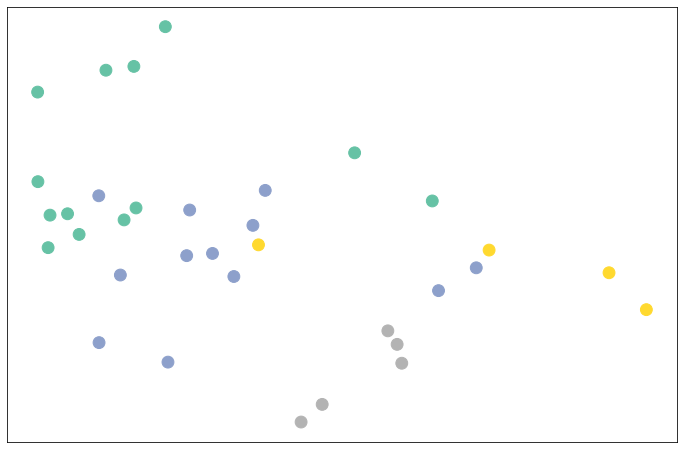

In [18]:
visualize_embedding(h, color=data.y)
# Note : 4 classes are visible
# Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized completely at random

In [19]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))


<IPython.core.display.Javascript object>

In [20]:
model = GCN()

In [21]:
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.

In [22]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.


In [23]:
# added by me
final_h = h

In [24]:
def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

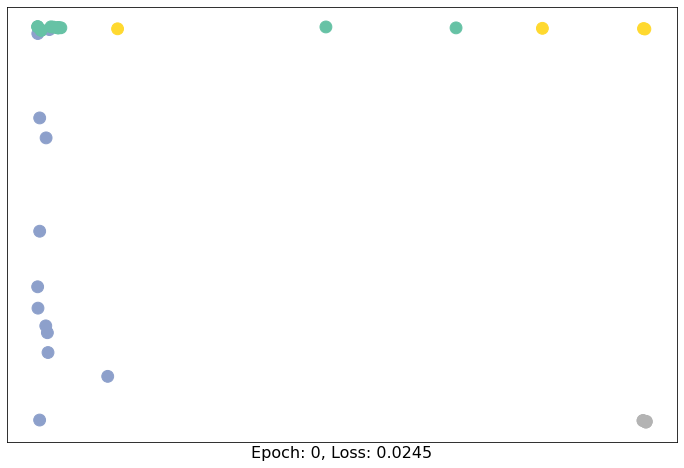

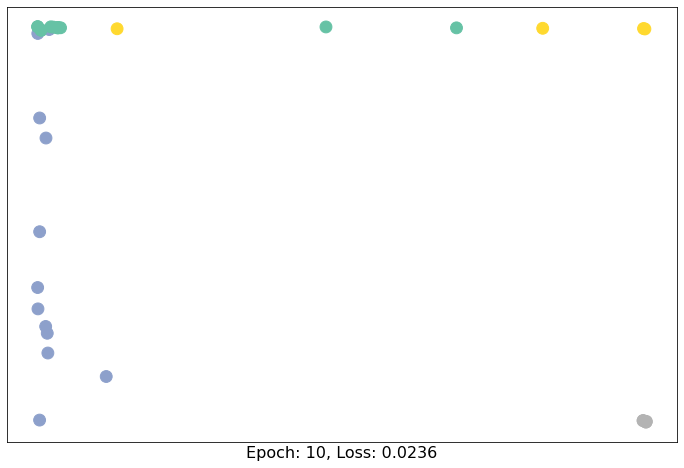

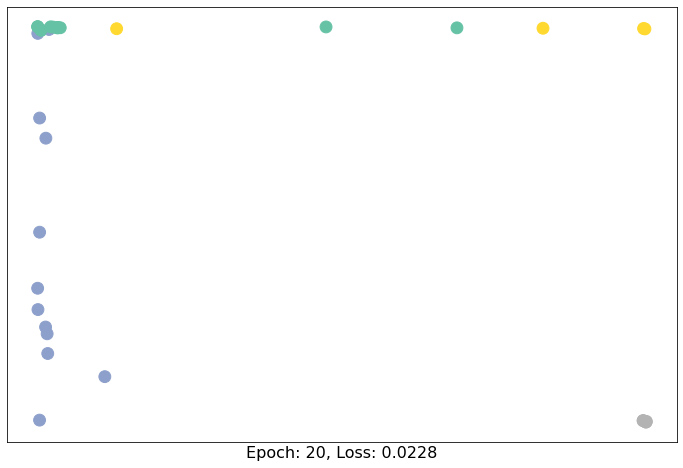

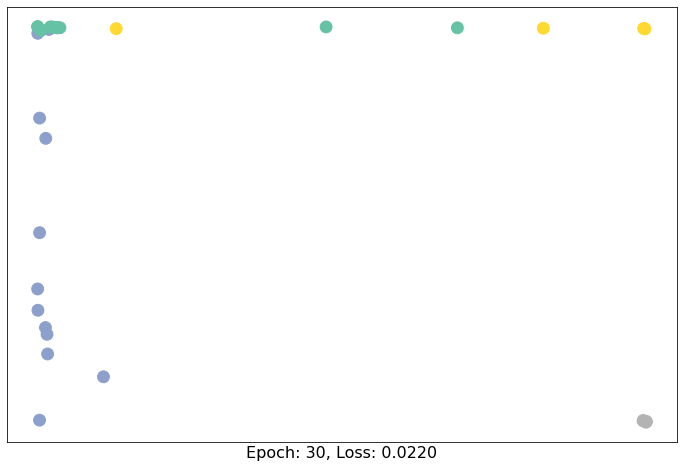

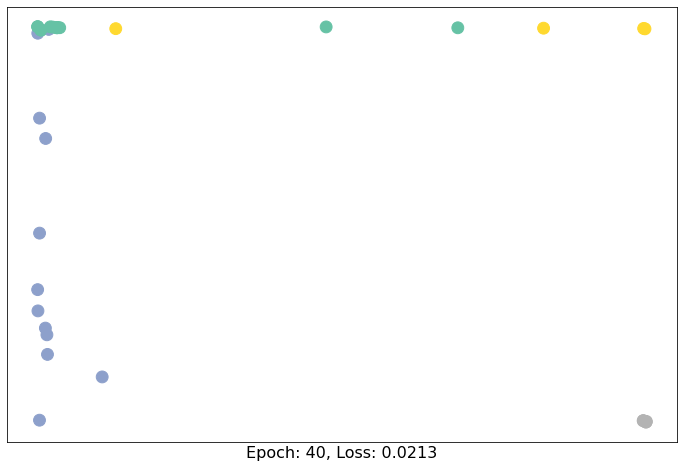

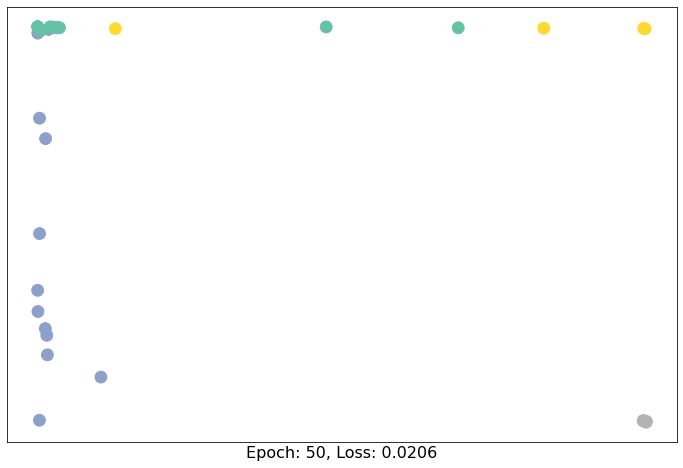

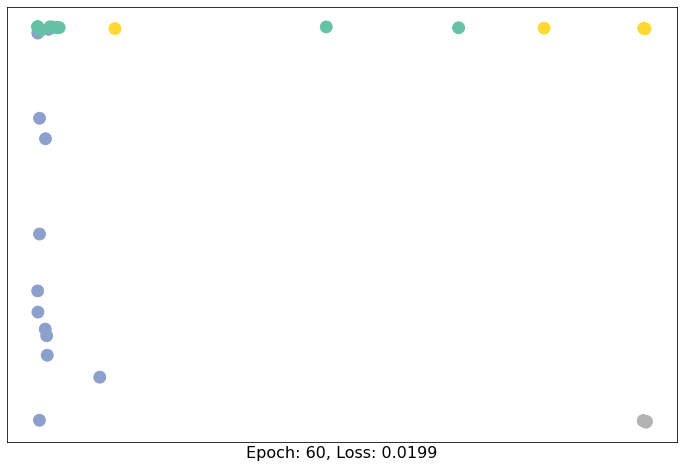

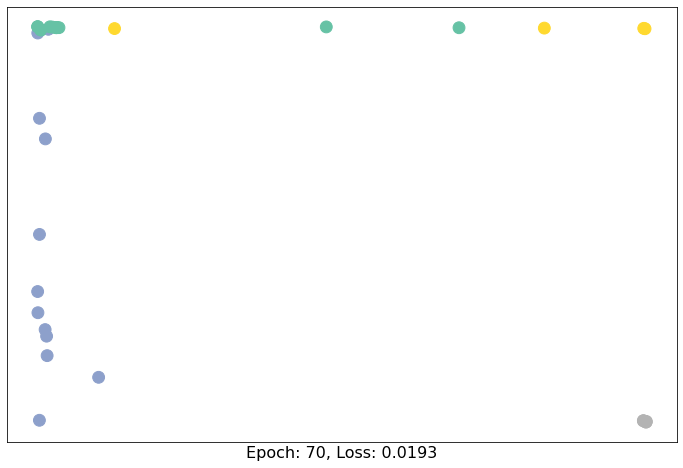

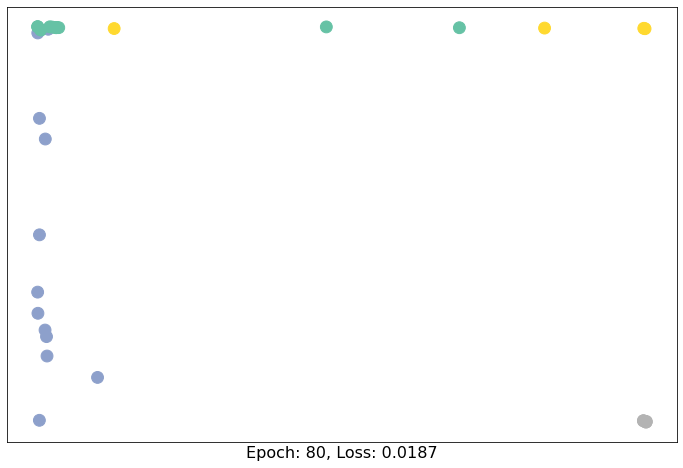

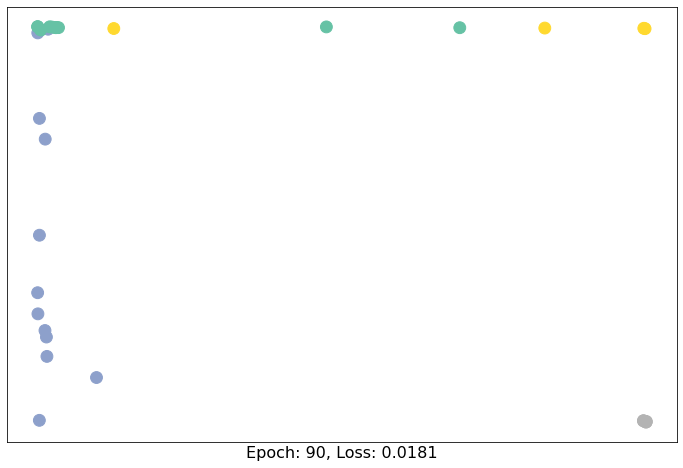

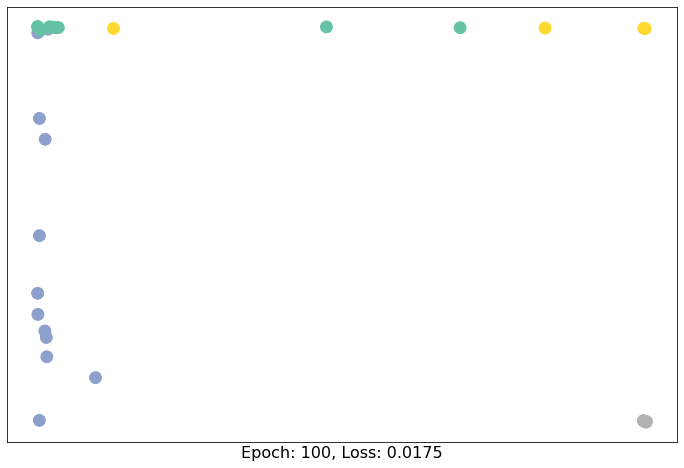

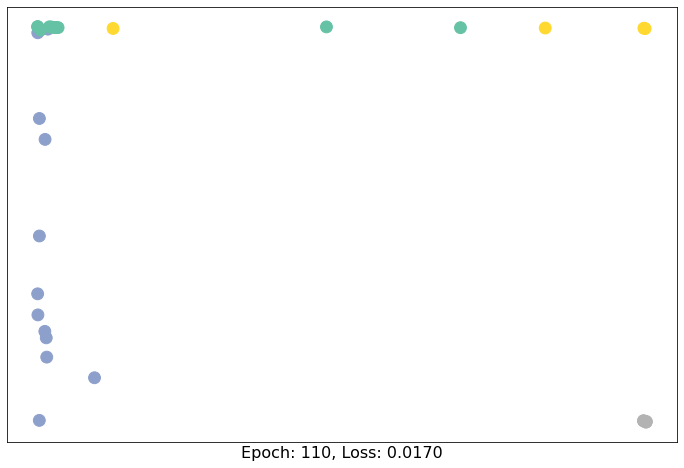

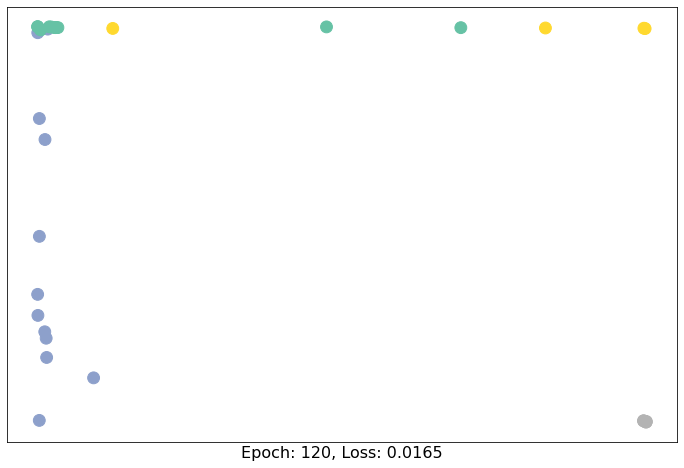

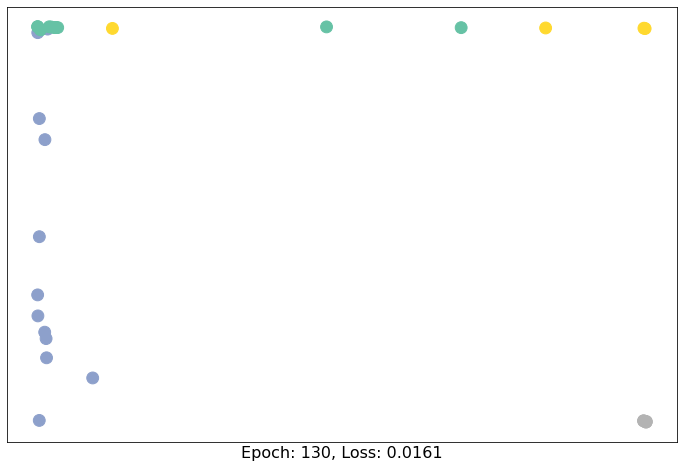

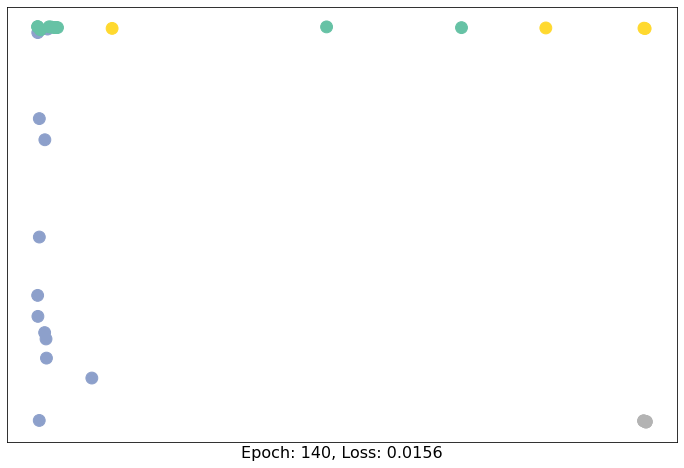

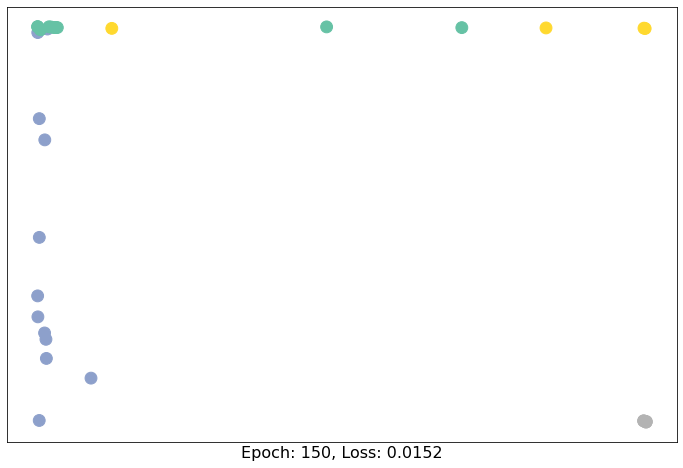

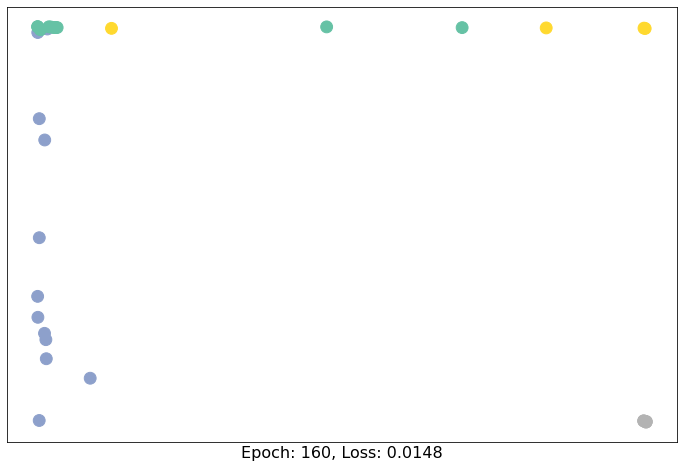

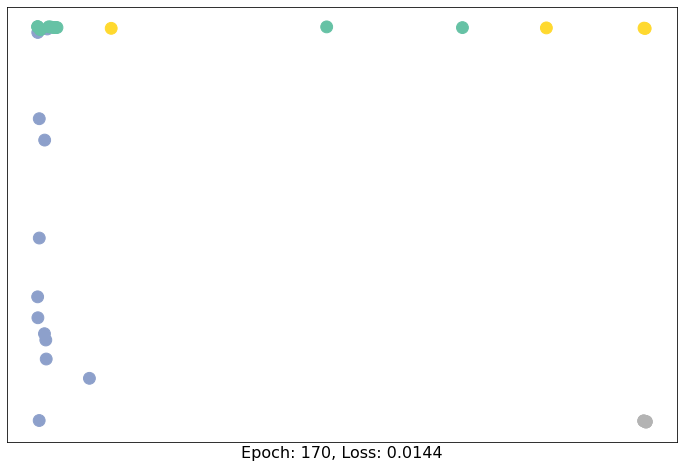

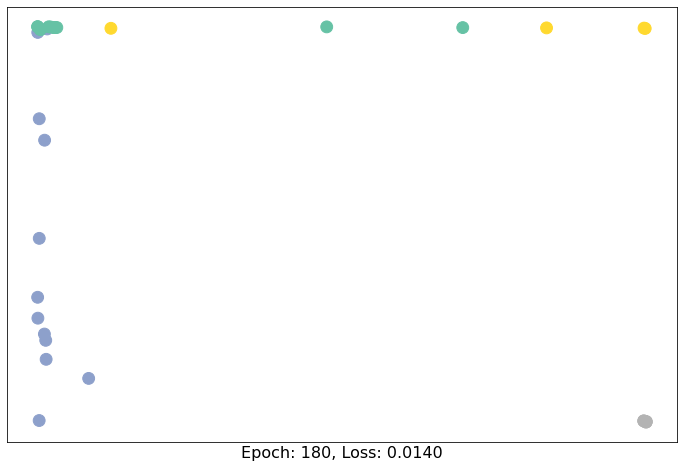

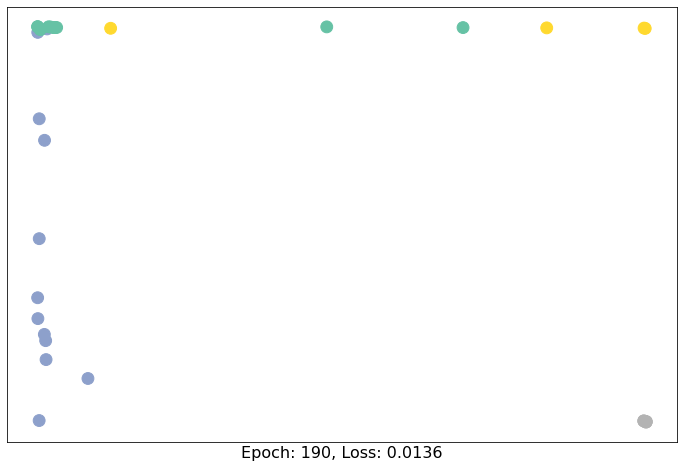

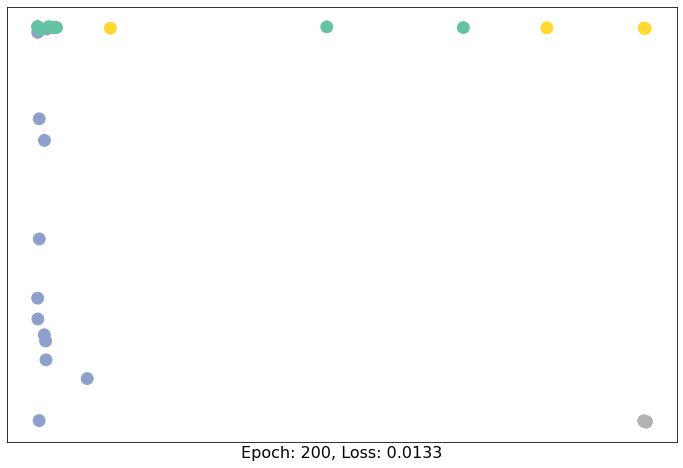

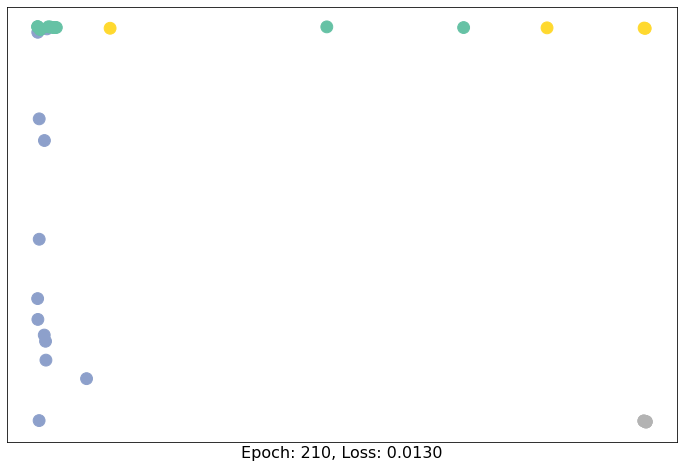

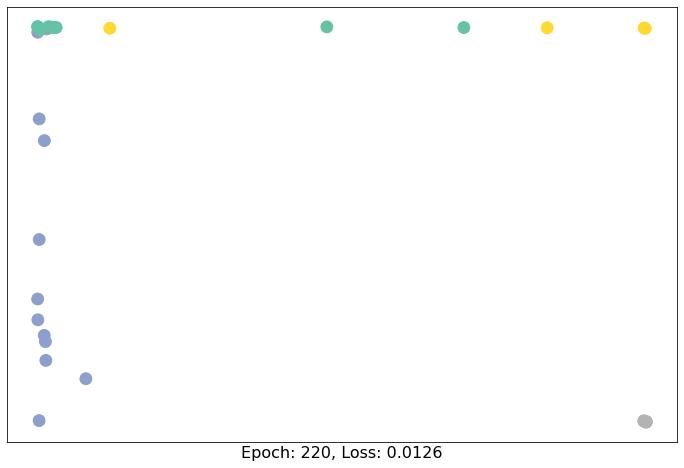

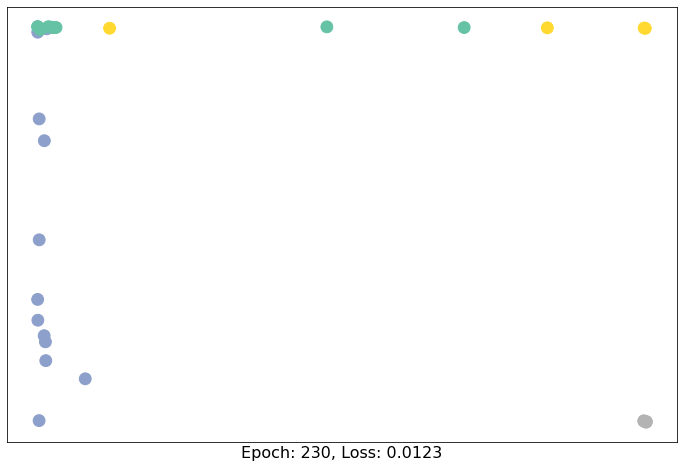

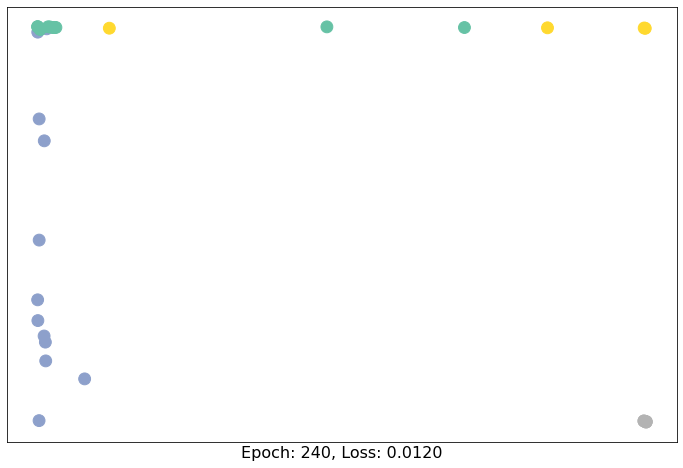

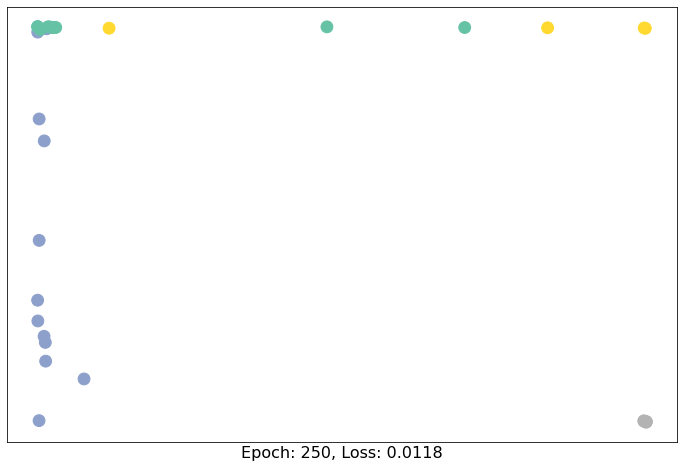

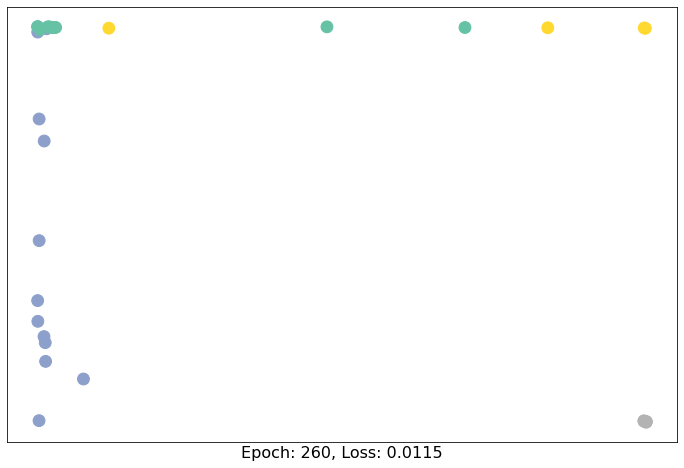

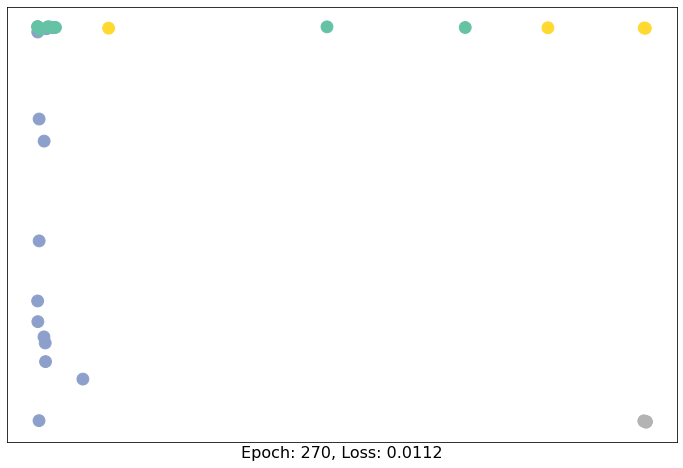

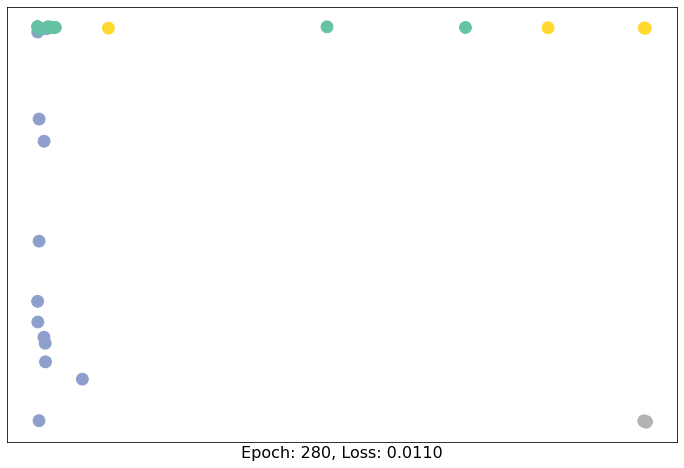

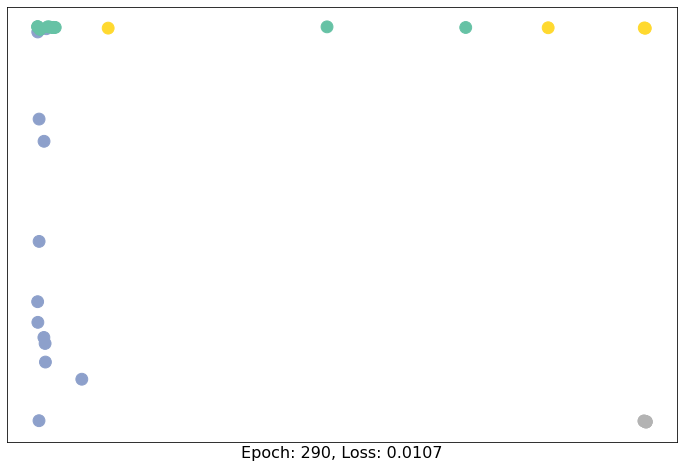

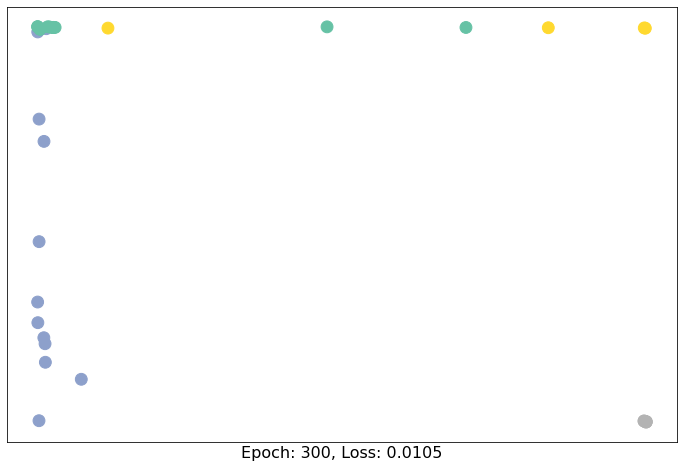

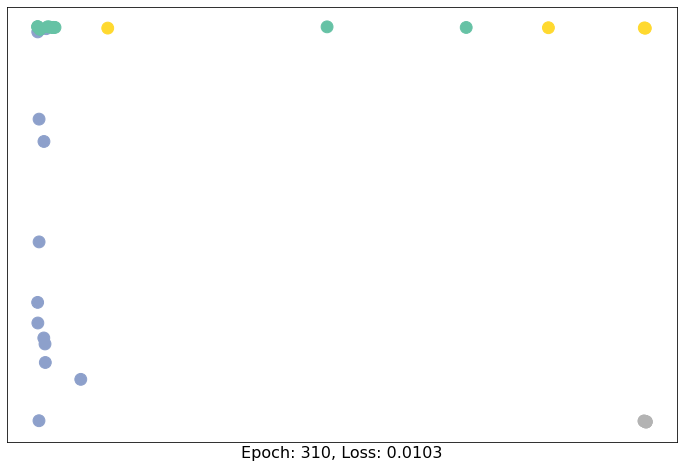

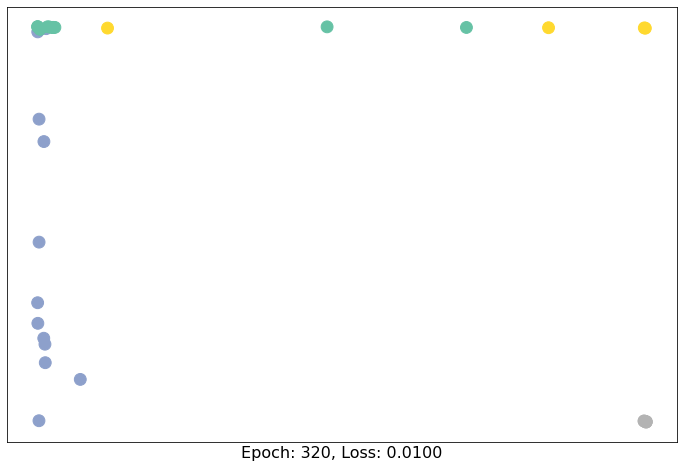

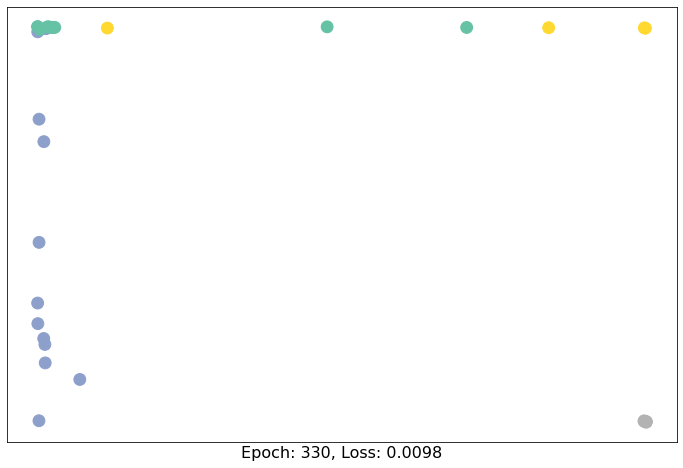

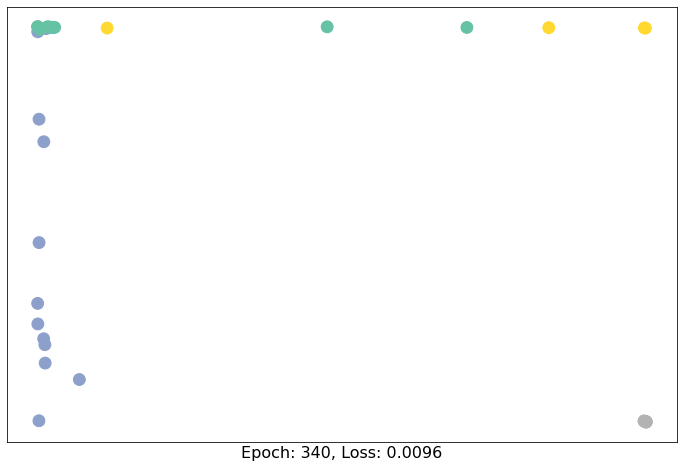

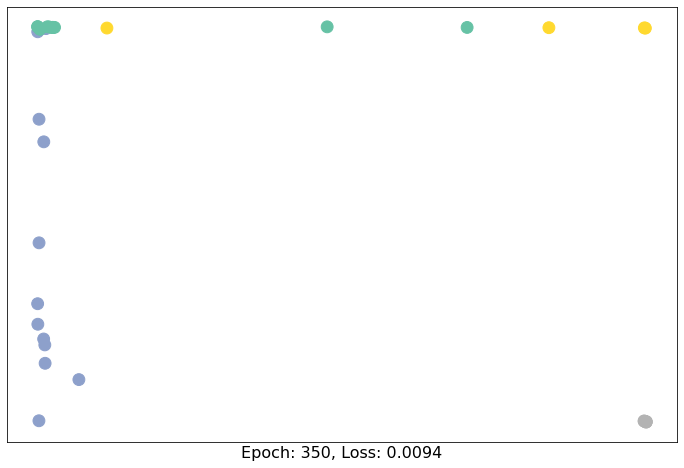

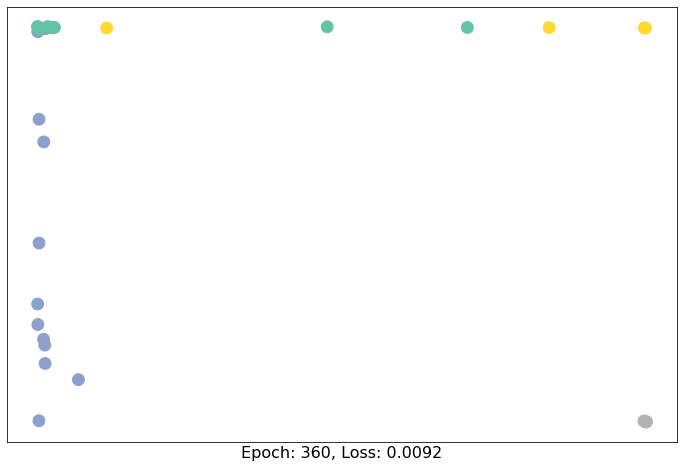

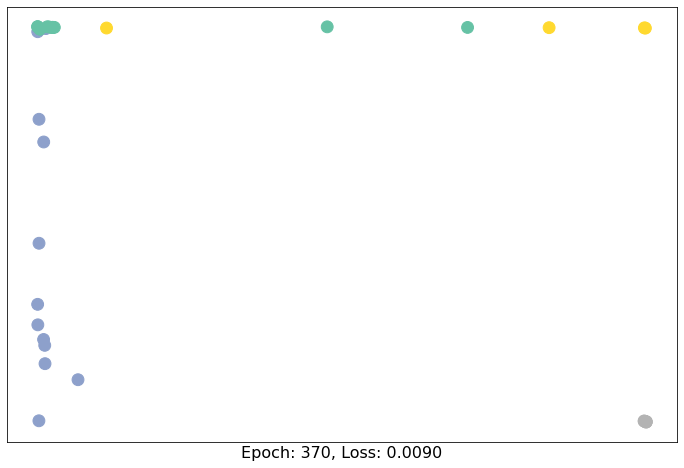

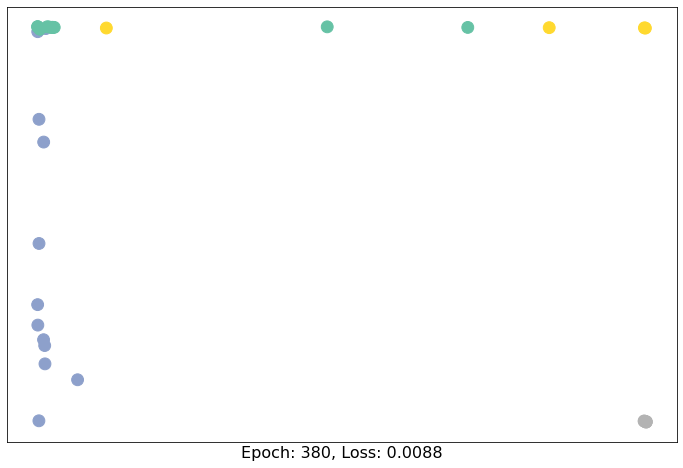

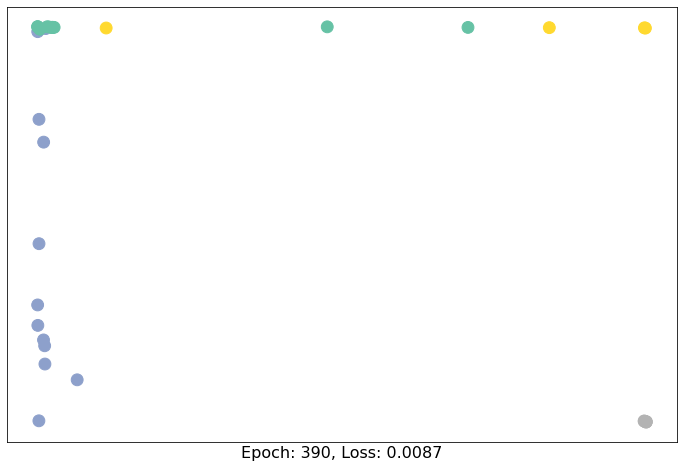

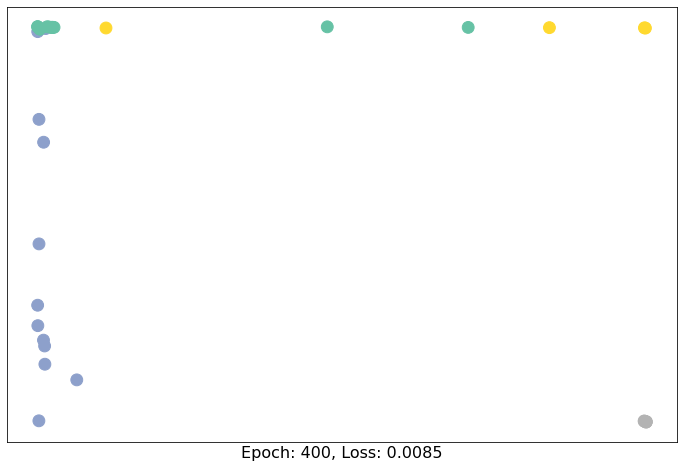

In [26]:
for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        ## Added by Me
        final_h = h

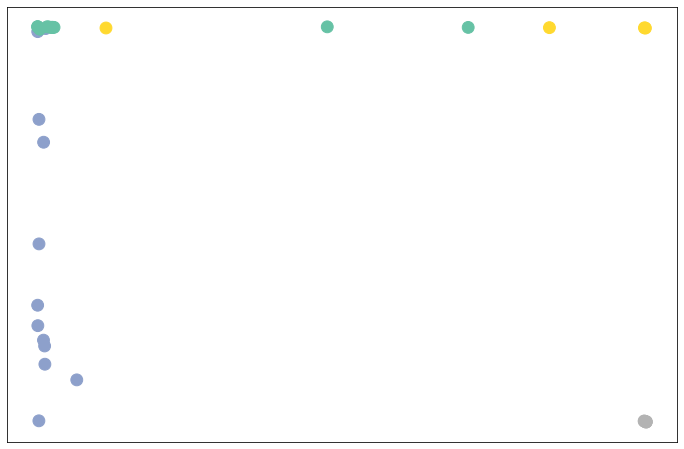

In [27]:
visualize_embedding(h, color=data.y)

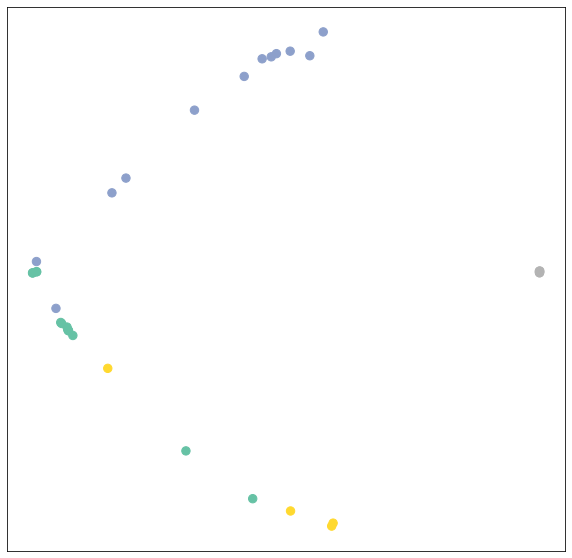

In [28]:
visualize_tsne(h, color=data.y)

# **Result:**
The 3-layer GCN model manages to linearly separating the communities and classifying most of the nodes correctly.

In [29]:
model.eval()
out = model(data.x, data.edge_index)
out

(tensor([[-0.1725,  5.4453, -5.5782,  0.1491],
         [ 1.4741,  3.7828, -3.9650, -1.4976],
         [ 5.3494, -0.1770, -0.1143, -5.3670],
         [ 1.1832,  4.0769, -4.2505, -1.2067],
         [-4.8904,  0.8330,  0.5678,  6.1149],
         [-4.9185,  0.8322,  0.5738,  6.1468],
         [-4.9185,  0.8322,  0.5738,  6.1468],
         [ 2.3326,  2.8850, -3.0883, -2.3520],
         [ 5.3686, -0.2334, -0.0530, -5.3813],
         [ 5.3309, -0.2825,  0.0101, -5.3320],
         [-4.8906,  0.8328,  0.5681,  6.1151],
         [ 0.1127,  4.5642, -4.6176, -0.0572],
         [ 0.5824,  4.5808, -4.7212, -0.5922],
         [ 4.0971,  1.0829, -1.3361, -4.1140],
         [ 5.3014, -0.3446,  0.0868, -5.2903],
         [ 5.2993, -0.3468,  0.0897, -5.2876],
         [-4.9145,  0.8240,  0.5824,  6.1434],
         [ 0.8429,  4.3189, -4.4672, -0.8528],
         [ 5.2966, -0.3513,  0.0954, -5.2839],
         [ 3.7369,  1.3787, -1.6110, -3.7447],
         [ 5.2830, -0.3630,  0.1112, -5.2670],
         [ 0.

Note: As we do not have test_mask so we can not check the acuracy of the graph to find what % of the node are correctly set into their correct class.

In [30]:
model.state_dict()

OrderedDict([('conv1.bias', tensor([-0.0397,  0.0173,  0.0473,  0.0296])),
             ('conv1.lin.weight',
              tensor([[ 1.0243, -0.6395, -0.6957, -0.0322,  0.6462,  1.1972,  0.8319, -0.3337,
                       -0.6586, -1.0422,  0.9320, -0.2298,  0.4119, -0.5229, -0.8294, -0.4336,
                        1.0454,  0.3031, -0.9974,  0.0831, -0.6733,  0.2411, -0.3786, -0.6339,
                        0.4306,  0.3830, -0.5169, -0.0634, -1.2263, -1.0966, -1.1322, -0.2402,
                       -0.6546, -0.6885],
                      [-1.1174, -1.3425,  0.2399, -0.8361, -0.4377, -0.2642, -0.8465, -1.3167,
                        0.1212,  0.4112, -0.9743, -0.8041, -1.0457, -0.8706,  0.4155,  0.5927,
                       -0.5644, -1.1382,  1.0100, -1.2829,  0.7573, -1.2932,  0.5866,  0.9865,
                        1.3001,  1.3944,  0.7132,  1.0722,  0.9405,  1.2474,  0.2586,  1.4070,
                        0.5991,  1.1013],
                      [-0.3520,  0.6373,  0.906

In [31]:
model.type

<bound method Module.type of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [32]:
model.share_memory

<bound method Module.share_memory of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [33]:
model.parameters

<bound method Module.parameters of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [34]:
model.get_parameter

<bound method Module.get_parameter of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [35]:
model.get_submodule

<bound method Module.get_submodule of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [36]:
torch.save(model.state_dict(), 'karate-club.h5')

In [37]:
torch.save(model, 'karate-club_full.h5')

In [38]:
!ls -lah /content 

total 32K
drwxr-xr-x 1 root root 4.0K Mar 26 13:50 .
drwxr-xr-x 1 root root 4.0K Mar 26 13:30 ..
drwxr-xr-x 4 root root 4.0K Mar 23 18:56 .config
-rw-r--r-- 1 root root 8.4K Mar 26 13:50 karate-club_full.h5
-rw-r--r-- 1 root root 3.5K Mar 26 13:50 karate-club.h5
drwxr-xr-x 1 root root 4.0K Mar 23 18:57 sample_data
